In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact # 互動元件

In [2]:
url = "https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv"
data = pd.read_csv(url)
#print(data)

# y = w*x + b 並分離出x, y
x = data["YearsExperience"]
y = data["Salary"]

def compute_cost(x, y, w, b):
  y_predict = w*x + b
  cost = (y-y_predict)**2
  cost = cost.sum()/len(x)
  return cost

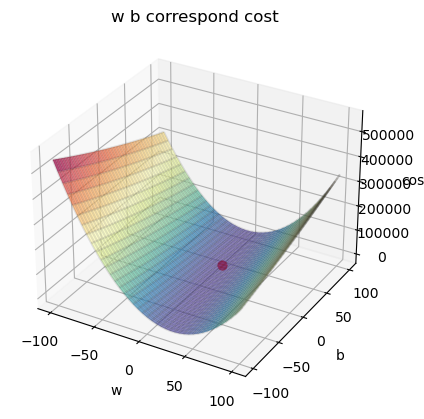

In [3]:
# w=-100~100 b=-100~100 的 cost
ws = np.arange(-100, 101)
bs = np.arange(-100, 101)
costs = np.zeros((201, 201))

i = 0
for w in ws:
  j = 0
  for b in bs:
    cost = compute_cost(x, y, w, b)
    costs[i,j] = cost
    j = j+1
  i = i+1

ax = plt.axes(projection="3d") #3D空間
#ax.view_init(45, 120) #旋轉角度
#ax.xaxis.set_pane_color((0,0,0)) #設定背景顏色
#ax.yaxis.set_pane_color((0,0,0))
#ax.zaxis.set_pane_color((0,0,0))

b_grid, w_grid = np.meshgrid(bs, ws)
ax.plot_surface(w_grid, b_grid, costs, cmap="Spectral_r", alpha=0.7) #cmap設定顏色 alpha設定透明度3
ax.plot_wireframe(w_grid, b_grid, costs, color="black", alpha=0.1) #邊框顏色
ax.set_title("w b correspond cost")
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("cost")

#print(np.min(costs)) #找出函數最低點
w_index, b_index = np.where(costs == np.min(costs))
ax.scatter(ws[w_index], bs[b_index], costs[w_index, b_index], color="red", s=40) #s為大小 印出最小cost的點
# print(f"當w={ws[w_index]}, b={bs[b_index]} 會有最小cost:{costs[w_index, b_index]}")
plt.show()